***Sentiment Analysis***

1.   Text Blob




In [9]:
from textblob import TextBlob

def sentiment_analysis(tweet):
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity

    def getPolarity(text):
        return TextBlob(text).sentiment.polarity

    tweet["TextBlob_Subjectivity"] = tweet["tweet"].apply(getSubjectivity)
    tweet["TextBlob_Polarity"] = tweet["tweet"].apply(getPolarity)

    def getAnalysis(score):
        if score < 0:
            return "Negative"
        elif score == 0:
            return "Neutral"
        else:
            return "Positive"

    tweet["TextBlob_Analysis"] = tweet["TextBlob_Polarity"].apply(getAnalysis)
    return tweet

In [12]:
import pandas as pd
tweet = pd.DataFrame([{"tweet": "Customers like the sound quality, design, and battery life of the headphones. They mention that they're excellent for longer listening, have a classy appearance, and great battery life. Some are satisfied with the comfort. However, some customers disagree on the value for money, charging speed, and fit."}])
sentiment_analysis(tweet)

,tweet,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,"Customers like the sound quality, design, and ...",0.741667,0.533333,Positive



2.   Sentiment Intensity Analyzer


In [29]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
def sentiment_analysis(tweet_1):
    def get_sentiment(text_1):
        sid = SentimentIntensityAnalyzer()
        scores = sid.polarity_scores(text_1)
        if scores['compound'] < 0:
            return 'Negative'
        elif scores['compound'] == 0:
            return 'Neutral'
        else:
            return 'Positive'

    tweet_1['Sentiment_Analysis'] = tweet_1['tweet_1'].apply(get_sentiment)
    return tweet_1

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
tweet_1 = pd.DataFrame([{"tweet_1": "Customers like the sound quality, design, and battery life of the headphones. They mention that they're excellent for longer listening, have a classy appearance, and great battery life. Some are satisfied with the comfort. However, some customers disagree on the value for money, charging speed, and fit."}])
sentiment_analysis(tweet_1)

,tweet_1,Sentiment_Analysis
0,"Customers like the sound quality, design, and ...",Positive


3.   Word Cloud



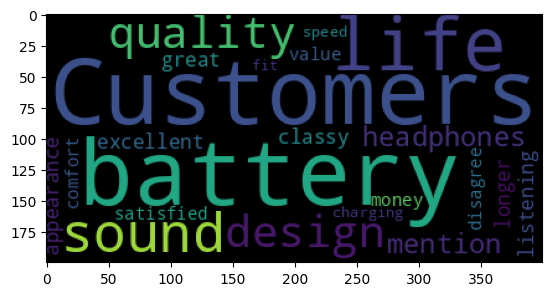

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = "Customers like the sound quality, design, and battery life of the headphones. They mention that they're excellent for longer listening, have a classy appearance, and great battery life. Some are satisfied with the comfort. However, some customers disagree on the value for money, charging speed, and fit."
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)

4.   Bag of words




In [43]:
from sklearn.feature_extraction.text import CountVectorizer
# Multiple documents
text = ["It was the best of times", "it was the worst of times", "it was the age of wisdom", "it was the age of foolishness"]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# encode another document
text2 = ["the the the times"]
vector = vectorizer.transform(text2)
print(vector.toarray())

[[0 0 0 0 0 3 1 0 0 0]]




5.   NGRAM



In [45]:
nltk.download('punkt')

from nltk import ngrams
from nltk.tokenize import word_tokenize

# Example sentence
sentence = "Customers like the sound quality, design and battery life of the headphones."
# Tokenize the sentence
tokens = word_tokenize(sentence)

# Generate bigrams
bigrams = list(ngrams(tokens, 2))

# Generate trigrams
trigrams = list(ngrams(tokens, 3))

# Print the results
print("Bigrams:", bigrams)
print("Trigrams:", trigrams)

Bigrams: [('Customers', 'like'), ('like', 'the'), ('the', 'sound'), ('sound', 'quality'), ('quality', ','), (',', 'design'), ('design', ','), (',', 'and'), ('and', 'battery'), ('battery', 'life'), ('life', 'of'), ('of', 'the'), ('the', 'headphones'), ('headphones', '.')]
Trigrams: [('Customers', 'like', 'the'), ('like', 'the', 'sound'), ('the', 'sound', 'quality'), ('sound', 'quality', ','), ('quality', ',', 'design'), (',', 'design', ','), ('design', ',', 'and'), (',', 'and', 'battery'), ('and', 'battery', 'life'), ('battery', 'life', 'of'), ('life', 'of', 'the'), ('of', 'the', 'headphones'), ('the', 'headphones', '.')]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
